In [1]:
#Importing all the required modules used for visualization purposes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib_venn import venn2
#run in iPython shell or pip install matplotlib_venn into OS shell 

from sklearn.decomposition import PCA

# Download the 3 data files before visualization and analysis 


#CKD data set: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

#PIMA diabetes data set: https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv

#NYS patient characteristics survey:https://www.kaggle.com/new-york-state/nys-patient-characteristics-survey-pcs-2015?fbclid=IwAR2TH9VdNzOyBEZWJdjzZyp69rNbEvk9unsW267QoWLQyfLw6c2yZ6Ky6-U


In [ ]:
#########################################
# Project   : ARFF to CSV converter     #
# Created   : 10/01/17 11:08:06         #
# Author    : haloboy777                #
# Licence   : MIT                       #
#########################################

#This code is used to convert arff files to CSV
#https://github.com/haloboy777/arfftocsv/blob/master/arffToCsv.py
#The arff file must be in the directory.This code will output the it as a CSV 
#file
#
# Importing library
import os

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

In [2]:
#Load data files into variables before entering into following functions

alData=pd.read_csv('C:/Users/nguye/OneDrive/Desktop/UCSD/Fall_19/ECE143/chronic_kidney_disease_full_fixed.csv',error_bad_lines=False)
#https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
#Originally had an error when trying to read the csv file
#The data contains several question marks and answers that are not int/float

alData.columns=['age','blood pressure','specific gravity','albumin','sugar','red blood cells','pus cell','pus cell clumps','bacteria','blood glucose','blood urea','serum creatinine','sodium','potassium','hemoglobin','packed cell volume','white blood cell count','red blood cell count','hypertension','diabetes','coronary artery disease','appetite','edema','anemia','class']            
#Change the column names into string types

diab_data=pd.read_csv('C:/Users/nguye/OneDrive/Desktop/UCSD/Fall_19/ECE143/diabetes.csv')

In [7]:
def create_pie(csvfile,classv='ckd'):
    '''this function will create a pie chart from raw file modified with str
    as heading names. the csvfile is specifically for the CKD dataset (alData variable). the dataset contains
    features diabetes and class variable CKD. this function is generating pie charts with information from the
    class or CKD column only. otherwise, it will create a pie chart along the diabetes column
    
    param csvfile: this is the raw CKD csvfile
    param classv: 'ckd' to create pie for ckd classes. otherwise, create pie for diabetes
    
    type csvfile: pd.DataFrame
    type classv: str
    '''
    
    assert isinstance(csvfile,pd.DataFrame)
    assert isinstance(classv,str)
    assert 'class' in csvfile.columns
    assert 'diabetes' in csvfile.columns
    assert csvfile.shape==(400,25)
    assert classv=='ckd' or classv=='nockd'
    
    
    
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#383838'
    plt.rcParams['axes.labelcolor']= '#909090'
    plt.rcParams['xtick.color'] = '#909090'
    plt.rcParams['ytick.color'] = '#909090'
    plt.rcParams['font.size']=16
            
    color_palette_list = ['#ff7676','#76ffbb']
    
    if classv=='ckd':
        counts=csvfile['class'].value_counts()
    
        disease_counts=(sum(counts)-counts['notckd'])/(sum(counts))*100
        #calculate percentage of disease counts

        fig, ax = plt.subplots()     
           
        labels = ['Chronic Kidney Disease ', 
         'Non Chronic Kidney Disease']
        percentages = [disease_counts, 100-disease_counts]
        explode=(0.1,0)
        ax.pie(percentages, explode=explode,  
               colors=color_palette_list[0:2], autopct='%1.0f%%', 
               shadow=False, startangle=0,   
               pctdistance=1.2,labeldistance=.4)
        ax.axis('equal')
        ax.set_title("62% of Sampled Patients are CKD+",pad=20)
        ax.legend(labels=labels,frameon=False, bbox_to_anchor=(.8,0.8))
        
    else:
        counts=csvfile['diabetes'].value_counts()
        disease_counts=(sum(counts)-counts['no']-counts['\tno']-counts['?'])/(sum(counts)-counts['?'])*100
        fig, ax = plt.subplots()  
        labels = ['Diabetes', 
         'No Diabetes']
        percentages = [disease_counts, 100-disease_counts]
        explode=(0.1,0)
        ax.pie(percentages, explode=explode,  
               colors=color_palette_list[0:2], autopct='%1.0f%%', 
               shadow=False, startangle=0,   
               pctdistance=1.2,labeldistance=.4)
        ax.axis('equal')
        ax.set_title("34% of Sampled Patients are also Diabetes+",pad=20)
        ax.legend(labels=labels,frameon=False, bbox_to_anchor=(.8,0.8))

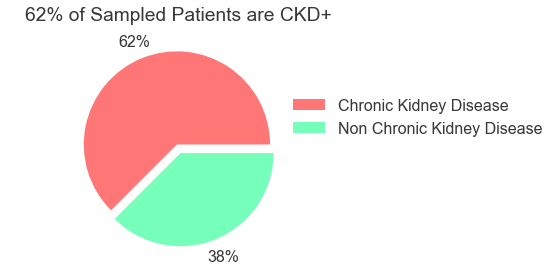

In [8]:
create_pie(alData)

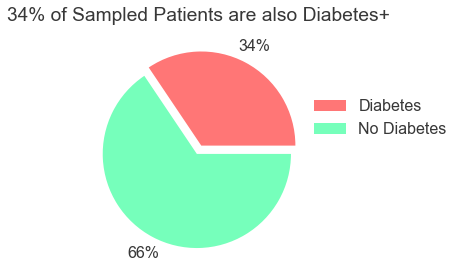

In [9]:
create_pie(alData,classv='nockd')

In [14]:
def create_pie2(csvfile,ckd=False):
    '''this function will create a pie chart for patients that are ckd+ and diabetes+.
    essentially, it will extract the ckd class values and then search for values where
    there are diabetes+ feature values. otherwise, it will generate and extract nockd class values
    and then plot the diabetes feature values into a pie chart
    
    param csvfile: this is the raw CKD csvfile
    param ckd: True to create pie for ckd classes. otherwise, create pie for nockd values
    
    type csvfile: pd.DataFrame
    type ckd: bool
    '''
    
    assert isinstance(csvfile,pd.DataFrame)
    assert isinstance(ckd,bool)
    assert 'class' in csvfile.columns
    assert 'diabetes' in csvfile.columns
    assert csvfile.shape==(400,25)
    assert ckd==False or ckd==True
    
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#383838'
    plt.rcParams['axes.labelcolor']= '#909090'
    plt.rcParams['xtick.color'] = '#909090'
    plt.rcParams['ytick.color'] = '#909090'
    plt.rcParams['font.size']=16
            
    color_palette_list = ['#ff7676','#76ffbb']
    
    alDataNaN=csvfile.replace('?',np.NaN)
    
    venn=alDataNaN[['class','diabetes']]
    venn=venn.dropna()
    
    if ckd==False:
        notckd=venn.loc[venn['class'] == 'notckd']
        num_no=notckd['diabetes'].value_counts()
        store=num_no['no']
        
        disease_counts=0
        #all are chosen to not have CKD
    
        fig, ax = plt.subplots()  
        labels = ['CKD- Diabetes+', 
                  'CKD- Diabetes-']
        percentages = [disease_counts, store/len(notckd) *100]
        explode=(0.1,0)
        ax.pie(percentages, explode=explode,  
               colors=color_palette_list[0:2], autopct='%1.0f%%', 
               shadow=False, startangle=0,   
               pctdistance=1.2,labeldistance=.4)
        ax.axis('equal')
        ax.set_title("100% of CKD- Patients are also Diabetes-")
        ax.legend(labels=labels,frameon=False, bbox_to_anchor=(.8,0.8))
    
    else:
        ckd=venn.loc[venn['class'] != 'notckd']
        num_no=ckd['diabetes'].value_counts()
        store=num_no['no']+num_no['\tno']
        
        fig, ax = plt.subplots()  
        labels = ['CKD+ Diabetes+', 
                  'CKD+ Diabetes-']
        percentages = [(len(ckd)-store)/len(ckd) *100, store/len(ckd) *100]
        explode=(0.1,0)
        ax.pie(percentages, explode=explode,  
               colors=color_palette_list[0:2], autopct='%1.0f%%', 
               shadow=False, startangle=0,   
               pctdistance=1.1,labeldistance=.2)
        ax.axis('equal')
        ax.set_title("55% of CKD+ Patients are also Diabetes+",pad=20)
        ax.legend(labels=labels,frameon=False, bbox_to_anchor=(.8,0.8))

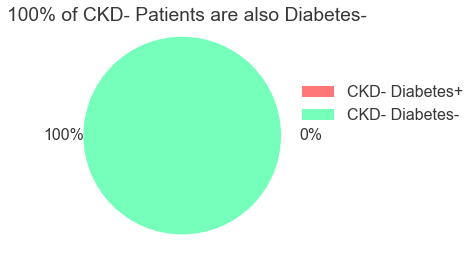

In [15]:
create_pie2(alData)

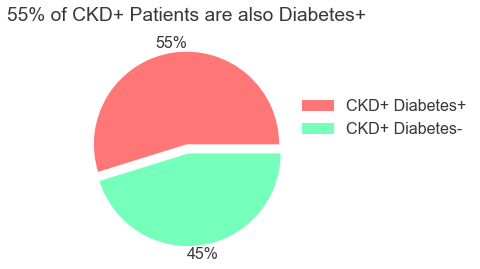

In [16]:
create_pie2(alData,ckd=True)

In [19]:
def create_venn(csvfile):
    '''this function will create a venn diagram between the two classes, hypertension and diabetes
    CKD class is not chosen because there exists no instances of values of no ckd with values of
    diabetes +. furthermore hypertension is a common condition in conjunction with ckd
    prognosis
    
    param csvfile: this is the raw CKD csvfile
 
    type csvfile: pd.DataFrame
    
    '''
    
    assert isinstance(csvfile,pd.DataFrame)
    assert 'class' in csvfile.columns
    assert 'diabetes' in csvfile.columns
    assert 'hypertension' in csvfile.columns
    assert csvfile.shape==(400,25)
    
    alDataNaN=csvfile.replace('?',np.NaN)
    
    venn=alDataNaN[['hypertension','diabetes']]
    venn=venn.dropna()
    
    ht_neg=venn.loc[venn['hypertension'] != 'yes']
    #separate/extract patients that are ht-   
    ht_neg_counts=ht_neg['diabetes'].value_counts()
    #count # of results in diabetes column
    ht_neg_d_pos=ht_neg_counts['yes']
    ## of ht-,d+ patients
    
    ht_pos=venn.loc[venn['hypertension'] == 'yes']
    ht_pos_counts=ht_pos['diabetes'].value_counts()
    ht_pos_d_neg=ht_pos_counts['no']
    
    ht_pos_d_pos=sum(ht_pos_counts)-ht_pos_d_neg
    
    plt.figure(figsize=(14,7))
    v=venn2(subsets=(ht_neg_d_pos,ht_pos_d_neg,ht_pos_d_pos))
    
    v.get_patch_by_id('100').set_color('#ff7676')
    v.get_patch_by_id('010').set_color('#2aff96')
    
    plt.title("Diabetes+ and Hypertension+ Relationship")
    plt.annotate('Diabetes+ Only', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
    plt.annotate('Hypertension+ Only', xy=v.get_label_by_id('010').get_position() - np.array([0, -0.1]), xytext=(70,70),
         ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))   
    
    plt.show()

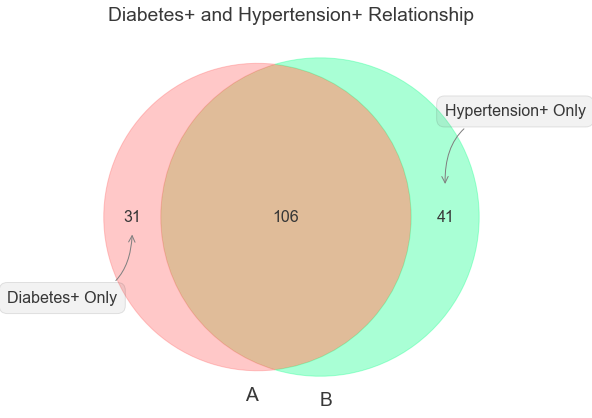

In [20]:
create_venn(alData)

In [33]:
def create_heat(csvfile,overlay='ckd',outcome='pos'):
    '''generate heatmap for given csv file. this will generate a heatmap for either the ckd
    or diabetes data set. furthermore, it will create a heatmap for the diseased+ or diseased-
    feature values.
    
    param csvfile: this is the raw CKD csvfile/ raw diabetes csvfile
    param overlay: this is to specify whether it is the CSV or diabetes data file.
                   if anything but ckd is mentioned, it will generate for diabetes
    param outcome: generate figures for diseased+ if given pos, otherwise generate  
                    figures for diseased free (diseased-)
    
    type csvfile: pd.DataFrame
    type overlay: str
    type outcome: str
    '''
    
    assert isinstance(csvfile,pd.DataFrame)
    assert isinstance(overlay,str)
    assert isinstance(outcome,str)

    assert overlay=='ckd' or overlay=='d'
    assert outcome=='pos' or outcome=='neg'

    
    
    alDataNaN=csvfile.replace('?',np.NaN)
    
    if overlay=='ckd':
        if outcome=='pos':
        
            nockd=alDataNaN.loc[alDataNaN['class'] =='notckd']
            #only store nockd values
            
            cleanData=nockd.drop(alDataNaN.columns[5:9],axis=1)
            
        
            cleanData2=cleanData.drop(cleanData.columns[14:21],axis=1)
            #Hard coded to remove the columns that contain strings! These will later be 
            #written to binary values (e.g. normal is 0 and abnormal is 1). The reason
            #for this is that we do not want to perform data analysis on a mix of binary
            #and float values
            #https://stackoverflow.com/questions/45333530/pandas-drop-columns
        
    
            cleanData2=cleanData2.dropna()
            #dropNaN values
    
            corr=cleanData2.astype('float64').corr()
    
    

            sns.heatmap(corr)
    
       
        #create if else statement 
        else:
            dandckd=alDataNaN.loc[alDataNaN['class']!='notckd']
            dandckd=dandckd.loc[dandckd['diabetes'] !='no']
            dandckd=dandckd.loc[dandckd['diabetes'] !='\tno']  
    
            cleanData=dandckd.drop(alDataNaN.columns[5:9],axis=1)


            cleanData2=cleanData.drop(cleanData.columns[14:21],axis=1)
        #Hard coded to remove the columns that contain strings! These will later be 
        #written to binary values (e.g. normal is 0 and abnormal is 1). The reason
        #for this is that we do not want to perform data analysis on a mix of binary
        #and float values
        #https://stackoverflow.com/questions/45333530/pandas-drop-columns
        
    
            cleanData2=cleanData2.dropna()
    #dropNaN values
    
            corr=cleanData2.astype('float64').corr()
    
    
    else:
       #for diabetes data file
       
         remove_nan=csvfile.replace('?',np.NaN)
     
         remove_zero=remove_nan.loc[remove_nan['Glucose'] !=0]
         remove_zero=remove_zero.loc[remove_zero['BloodPressure']!=0]
         remove_zero=remove_zero.loc[remove_zero['SkinThickness']!=0]
         remove_zero=remove_zero.loc[remove_zero['Insulin']!=0]
         remove_zero=remove_zero.loc[remove_zero['BMI']!=0]
         remove_zero=remove_zero.loc[remove_zero['DiabetesPedigreeFunction']!=0]
         remove_zero=remove_zero.loc[remove_zero['Age']!=0]
     
    
         remove_zero2=remove_zero.iloc[:,:-1]
     
         wdiab=remove_zero2.loc[remove_zero['Outcome']==1]
         wodiab=remove_zero2.loc[remove_zero['Outcome']==0]
     
         if outcome=='pos':
            corr=wdiab.astype('float64').corr()
             
     
            mask = np.zeros_like(corr)
            mask[np.triu_indices_from(mask)] = True
            plt.figure(figsize=(10,10))
            sns.set(font_scale=1.5)
            with sns.axes_style("white"):
                ax=sns.heatmap(corr,mask=mask,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,fmt='.3f',linewidths=.1,square=True,cmap='Reds')
            ax.collections[0].colorbar.set_label('Correlation Coefficient')
            ax.set_title('Diabetes+',fontsize=30)
             
         else:
             corr=wodiab.astype('float64').corr()
             
     
             mask = np.zeros_like(corr)
             mask[np.triu_indices_from(mask)] = True
             plt.figure(figsize=(10,10))
             sns.set(font_scale=1.5)
             with sns.axes_style("white"):
                ax=sns.heatmap(corr,mask=mask,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,fmt='.3f',linewidths=.1,square=True,cmap='Greens')
             ax.collections[0].colorbar.set_label('Correlation Coefficient')
             ax.set_title('Diabetes-',fontsize=30)
             

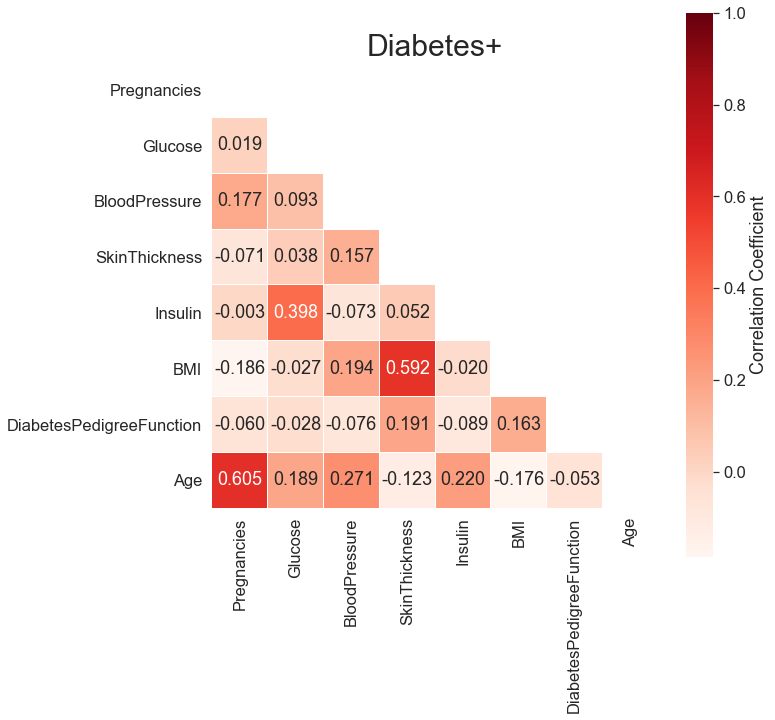

In [35]:
create_heat(diab_data,overlay='d',outcome='pos')

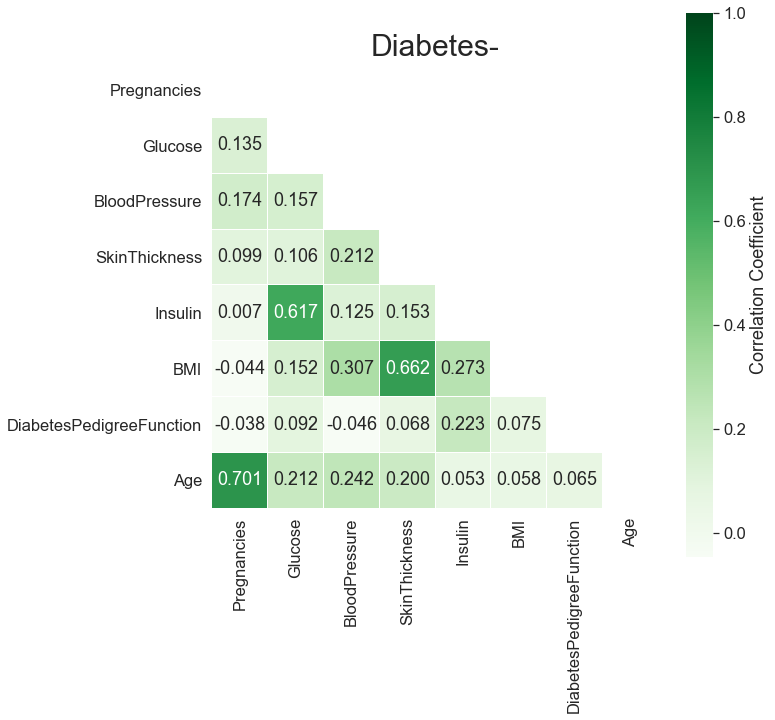

In [36]:
create_heat(diab_data,overlay='d',outcome='neg')

In [47]:
def do_pca(csvfile):
    '''this function will perform PCA on the input file, CKD raw data set. it will return 
    2 PCs and a scatter plot of the projected data points. it will also return a heatmap
    that informs the user how the principal component is distributed across features
    
    param csvfile: this is the raw csv for CKD data
    type csvfile: pd.DataFrame
    '''
    
    assert isinstance(csvfile,pd.DataFrame)
    
    assert 'class' in csvfile.columns
    assert 'diabetes' in csvfile.columns
    assert csvfile.shape==(400,25)

    
    alDataNaN=csvfile.replace('?',np.NaN)
    cleanData=alDataNaN.drop(alDataNaN.columns[5:9],axis=1)
    cleanData2=cleanData.drop(cleanData.columns[14:21],axis=1)
    #Hard coded to remove the columns that contain strings! These will later be 
    #written to binary values (e.g. normal is 0 and abnormal is 1). The reason
    #for this is that we do not want to perform data analysis on a mix of binary
    #and float values
    #https://stackoverflow.com/questions/45333530/pandas-drop-columns
    cleanwCKD=cleanData.drop(cleanData.columns[14:20],axis=1)

    new_data = cleanData2
    
    #append ckd information to new_data, this will be used to overlay data
    cleanwCKD_drop=cleanwCKD.dropna().values



    pca=PCA(n_components=2)
    pca.fit(new_data.dropna().values)
    #new_data is 400x14 (removed binary features)

    #Project onto 2 PCs
    projected=pca.transform(new_data.dropna().values)
    top2var=pca.explained_variance_ratio_[:2]

    print("original shape:   ", new_data.dropna().values.shape)
    print("transformed shape:", projected.shape)
    print(pca.explained_variance_ratio_)
    #Abnormally high variance captured in first PC.... Could be explained by
    #the very small number of features and the looking at histograms
    #show that a lot of the features are kind of useless

    #append class ckd to new_data2
    plt.figure(figsize=(14,7))
    #Overlay with CKD vs no CKD
    for i in range(len(new_data.dropna().values)):
        #go along the rows, checking if that row has ckd or no ckd
        if cleanwCKD_drop[i,-1] == 'ckd':  
            s1=plt.scatter(projected[i,0],projected[i,1],c='r',label = 'ckd',alpha=0.45,s=40)
        if cleanwCKD_drop[i,-1] == 'notckd':
            s2=plt.scatter(projected[i,0],projected[i,1],c='g',label = 'no ckd',alpha=0.45,s=40)

    plt.xlabel('First Principal Component',fontsize=20)
    plt.ylabel('Second Principal Component',fontsize=20)
    plt.legend((s1,s2),('CKD+','CKD-'),prop={'size':20})
    #plt.xticks([])
    #plt.yticks([])
    plt.box(False)
    plt.show()

#Find the top eigenvalues/features that capture most of the variance
#Compare to clear cut with histogram

#Find top 5 alleles for PC1
    num_genes=10
    v_sk=pca.components_.T
    top_PC=v_sk[:,0]
    abs_weight=np.abs(top_PC)
    weight_cutoff=sorted(abs_weight)[-num_genes]
    gene_positions=np.where(abs_weight>=weight_cutoff)[0]

    for position in gene_positions:
        gene_tag=new_data.columns[position]
        gene_weight=top_PC[position]
        print (gene_tag, gene_weight)
    

    #make sure to capture correct names -> strings for column titles
    plt.matshow(pca.components_,cmap='Greens')
    plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=16)
    plt.colorbar()
    plt.xticks(range(len(cleanData2.columns)),cleanData2.columns
    ,rotation=65,ha='left')
    #plt.tight_layout()
    plt.show()

original shape:    (203, 14)
transformed shape: (203, 2)
[9.99061430e-01 6.60937993e-04]


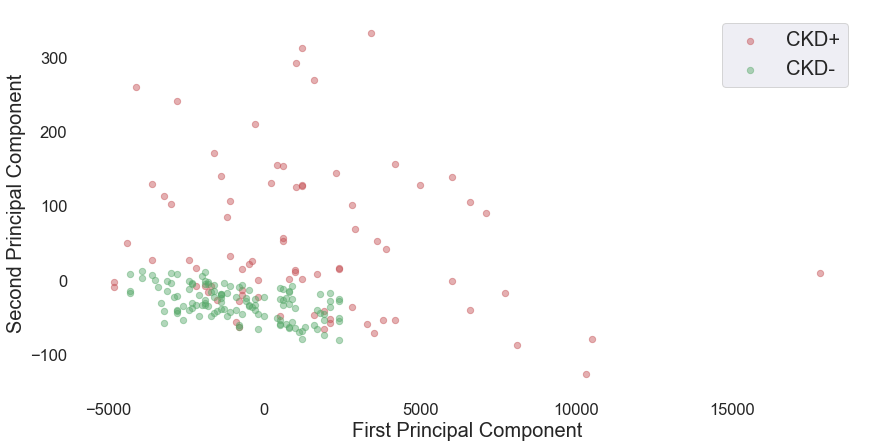

age 0.0009240031079171376
blood pressure 0.0002973163273551553
albumin 0.00012010301912278038
blood glucose 0.00530816069021652
blood urea 0.001429008400508912
sodium -0.00042557742778520863
potassium -0.00010989747749181235
hemoglobin -0.00029227110767685016
packed cell volume -0.0009228067174448298
white blood cell count 0.9999838381890261


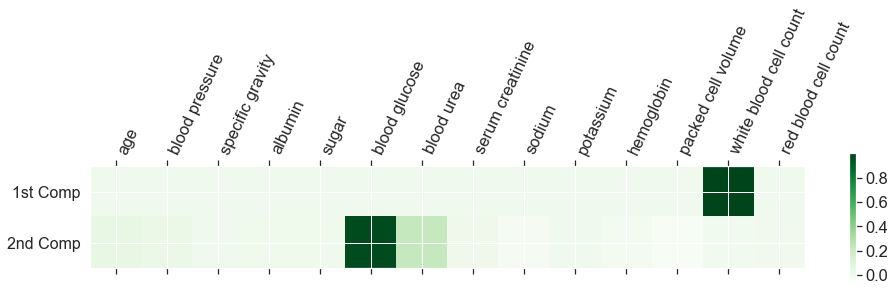

In [48]:
do_pca(alData)

This is from our third data and it shows the number of diffrent variables for both ckd+ and ckd_

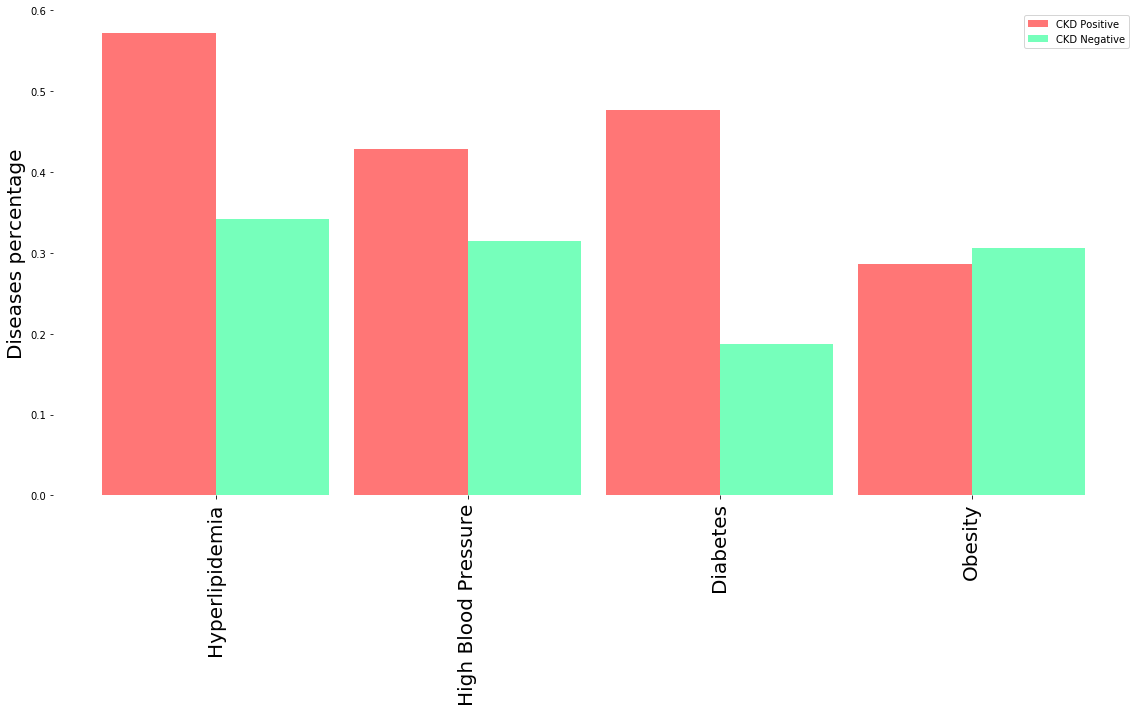

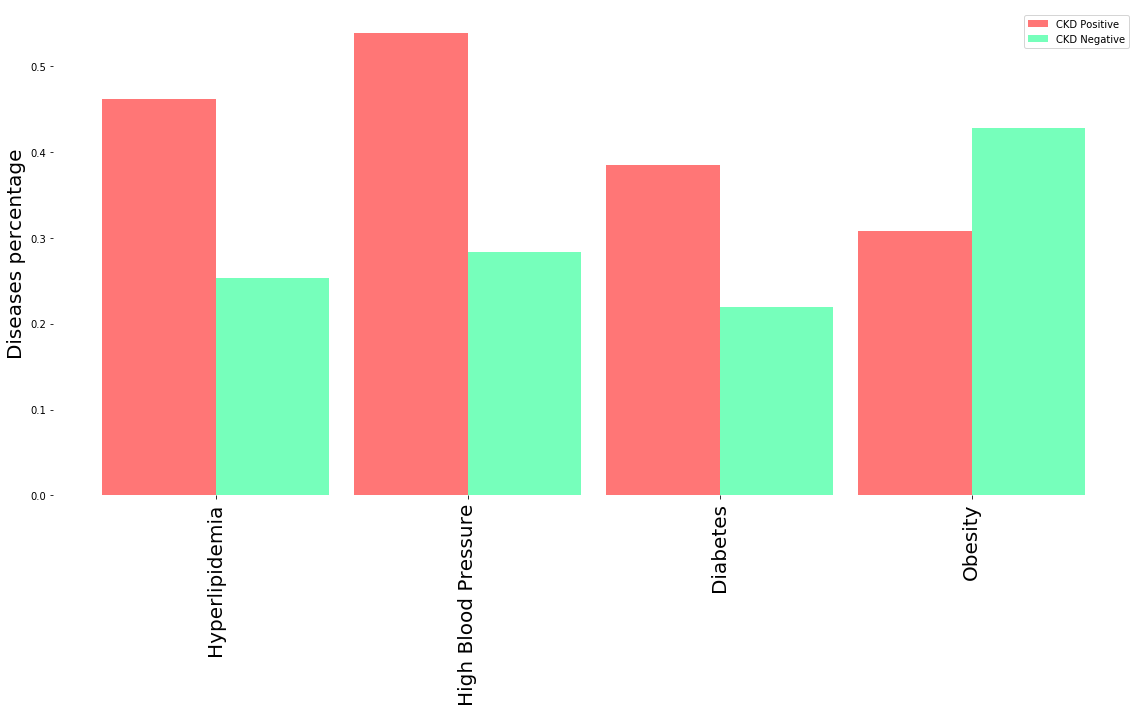

In [2]:
import pandas as pd      
import matplotlib.pyplot as plt    
import numpy as np


df = pd.read_csv('data3final.csv')

#emove all rows which contains unknown data.
data = df.replace(['UNKNOWN'], [None]).dropna(axis=0) 

#'Kidney Disease'?
Men_w_Kdis = data[(data['Age Group'] == 'ADULT') & (data['Sex'] == 'MALE') & (data['Kidney Disease'] == 'YES')]
Men_w_Kdis = Men_w_Kdis.append(Men_w_Kdis.eq('YES').mean(), ignore_index=True) # add new row : YES ratio
Men_w_Kdis = Men_w_Kdis.drop(columns=['Kidney Disease','Unnamed: 0', 'Age Group', 'Sex', 'Mental Illness' , 'Serious Mental Illness', 'Criminal Justice Status', 'Intellectual Disability', 'Autism Spectrum', 'Alcohol Related Disorder','Heart Attack','Stroke','Pulmonary Asthma','Alzheimer or Dementia','Liver Disease','Cancer','Smokes']) # remove unrealated column

Men_wo_Kdis = data[(data['Age Group'] == 'ADULT') & (data['Sex'] == 'MALE') & (data['Kidney Disease'] == 'NO')]
Men_wo_Kdis = Men_wo_Kdis.append(Men_wo_Kdis.eq('YES').mean(), ignore_index=True)
Men_wo_Kdis = Men_wo_Kdis.drop(columns = ['Kidney Disease','Unnamed: 0', 'Age Group', 'Sex', 'Mental Illness' , 'Serious Mental Illness', 'Criminal Justice Status', 'Intellectual Disability', 'Autism Spectrum', 'Alcohol Related Disorder','Heart Attack','Stroke','Pulmonary Asthma','Alzheimer or Dementia','Liver Disease','Cancer','Smokes'])

###################
Women_w_Kdis = data[(data['Age Group'] == 'ADULT') & (data['Sex'] == 'FEMALE') & (data['Kidney Disease'] == 'YES')]
Women_w_Kdis = Women_w_Kdis.append(Women_w_Kdis.eq('YES').mean(), ignore_index=True)
Women_w_Kdis = Women_w_Kdis.drop(columns=['Kidney Disease','Unnamed: 0', 'Age Group', 'Sex', 'Mental Illness' , 'Serious Mental Illness', 'Criminal Justice Status', 'Intellectual Disability', 'Autism Spectrum', 'Alcohol Related Disorder','Heart Attack','Stroke','Pulmonary Asthma','Alzheimer or Dementia','Liver Disease','Cancer','Smokes'])

Women_wo_Kdis = data[(data['Age Group'] == 'ADULT') & (data['Sex'] == 'FEMALE') & (data['Kidney Disease'] == 'NO')]
Women_wo_Kdis = Women_wo_Kdis.append(Women_wo_Kdis.eq('YES').mean(), ignore_index=True)
Women_wo_Kdis = Women_wo_Kdis.drop(columns=['Kidney Disease','Unnamed: 0', 'Age Group', 'Sex', 'Mental Illness' , 'Serious Mental Illness', 'Criminal Justice Status', 'Intellectual Disability', 'Autism Spectrum', 'Alcohol Related Disorder','Heart Attack','Stroke','Pulmonary Asthma','Alzheimer or Dementia','Liver Disease','Cancer','Smokes'])


#read average YES rate from the dataframe.
Men_data = pd.concat([Men_w_Kdis.tail(1), Men_wo_Kdis.tail(1)], keys = ['with Kidney Disease','w/o Kidney Disease'])
Women_data =  pd.concat([Women_w_Kdis.tail(1), Women_wo_Kdis.tail(1)],keys = ['with Kidney Disease','w/o Kidney Disease'])

####Graphing code######
width = 0.45  # the width of the bars



Men_label = list(Men_data.columns)

x = np.arange(len(Men_label))  # the label locations


fig, ax = plt.subplots(figsize = (16,10))
rects1 = ax.bar(x - width/2, Men_data.iloc[0], width ,label='CKD Positive', color = '#ff7676')
rects2 = ax.bar(x + width/2, Men_data.iloc[1], width , label='CKD Negative',color = '#76ffbb') 



ax.set_ylabel('Diseases percentage', fontsize = 20)
#ax.set_title('Diseases percentages of Men')
ax.set_xticks(x)
ax.set_xticklabels(Men_label)
plt.xticks(rotation='vertical', fontsize = 20)
ax.legend()

fig.tight_layout()
plt.box(False)
plt.show()
#plt.savefig('Men Diseases.png')
###########################


Women_label = list(Women_data.columns)

x = np.arange(len(Women_label))  # the label locations
#width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (16,10))
rects1 = ax.bar(x - width/2, Women_data.iloc[0], width, label='CKD Positive', color = '#ff7676')
rects2 = ax.bar(x + width/2, Women_data.iloc[1] ,width, label='CKD Negative', color = '#76ffbb')

ax.set_ylabel('Diseases percentage', fontsize = 20)
#ax.set_title('Diseases percentages of Women') 
ax.set_xticks(x)
ax.set_xticklabels(Men_label)
plt.xticks(rotation='vertical', fontsize = 20)
ax.legend()

fig.tight_layout()
plt.box(False)
plt.show()

In [25]:


# Read and Clean Data

pca_data = pd.read_csv('diabetes.csv')
remove_nan = pca_data.replace('?', np.NaN)

remove_zero = remove_nan.loc[remove_nan['Glucose'] != 0]
remove_zero = remove_zero.loc[remove_zero['BloodPressure'] != 0]
remove_zero = remove_zero.loc[remove_zero['SkinThickness'] != 0]
remove_zero = remove_zero.loc[remove_zero['Insulin'] != 0]
remove_zero = remove_zero.loc[remove_zero['BMI'] != 0]
remove_zero = remove_zero.loc[remove_zero['DiabetesPedigreeFunction'] != 0]
remove_zero = remove_zero.loc[remove_zero['Age'] != 0]

remove_zero2 = remove_zero.iloc[:, :-1]

data = remove_zero
data = data.sort_values(by='Age')

def gen_percentage_diab(data,object,window):
    '''this function will generate the percentage of people with and without diabetes. the data is compared by diffent
    health index (insulin,glucose,age etc). the mask used in this function is to cut the index into a certain range to
    show more group of percentage comparison. the freq below is to store the percentage.
    :param data:  dataframe
    :param object:  str
    :return:  dataframe
    '''
    import pandas as pd
    assert isinstance(data,pd.DataFrame)
    assert isinstance(object, str)
    left_range = data[object].min()
    end_range = data[object].max()
    freq = {}
    while True:
        mask = (left_range <= data[object]) & (data[object] < (left_range + window))
        m = data[mask]
        freq[str(left_range) + '-' + str(left_range + window)] = (m['Outcome'].sum()) / len(m[object])
        left_range += window
        if left_range > end_range:
            break
    zero_one_pd = pd.DataFrame(list(freq.items()), columns=[object, 'With_Diabetes'])
    zero_one_pd['Without_Diabetes'] = 1 - zero_one_pd['With_Diabetes']
    zero_one_pd = zero_one_pd.dropna()
    return zero_one_pd




def plot_diab_bar(zero_one_pd,title,object):
    """
    this function generate the plot figures according to the object (health indext) in the dataframe, for instance, 
    glucose, pregenac etc.
    
    :param zero_one_pd: pandas dataframe
    :param title: str
    :param ylabel: str
    :param object: str
    :return: pd
    """
    from matplotlib import pyplot as plt
    import pandas as pd
    import numpy as np
    fname = object + '.png'
    zero_one_pd = zero_one_pd.dropna()
    labels = tuple(zero_one_pd[object].values)
    label_1 = 'Diabetes -'
    label_2 = 'Diabetes +'
    ylabel = 'Percentage'
    ytick = ['0','0.2','0.4','0.6','0.8','1']


    left = zero_one_pd['Without_Diabetes']
    right = zero_one_pd['With_Diabetes']

    x = np.arange(len(labels))  # the label locations
    y = np.arange(0,1,0.2)
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots(figsize=(100,100))
    rects1 = ax.bar(x - width / 2, left, width, color='#76ffbb', label=label_1)
    rects2 = ax.bar(x + width / 2, right, width, color='#ff7676', label=label_2)

    # Add some text for labels, title and custom x-axis tick labels, etc.

    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(object,fontsize=20)
    ax.set_title(title,fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=18, rotation=45)
    ax.set_yticks(y)
    ax.set_yticklabels(np.array(ytick),fontsize=18)
    ax.legend(fontsize=20)
    plt.box(False)
    plt.show()



In [26]:
# Generate Pd

age_diab = gen_percentage_diab(data, object = 'Age' ,window = 6)
pregnancies_diab = gen_percentage_diab(data, object = 'Pregnancies' , window = 1)
insulin_diab = gen_percentage_diab(data, object = 'Insulin', window = 100)
glucose_diab = gen_percentage_diab(data, object =  'Glucose', window = 30)

/Users/moe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


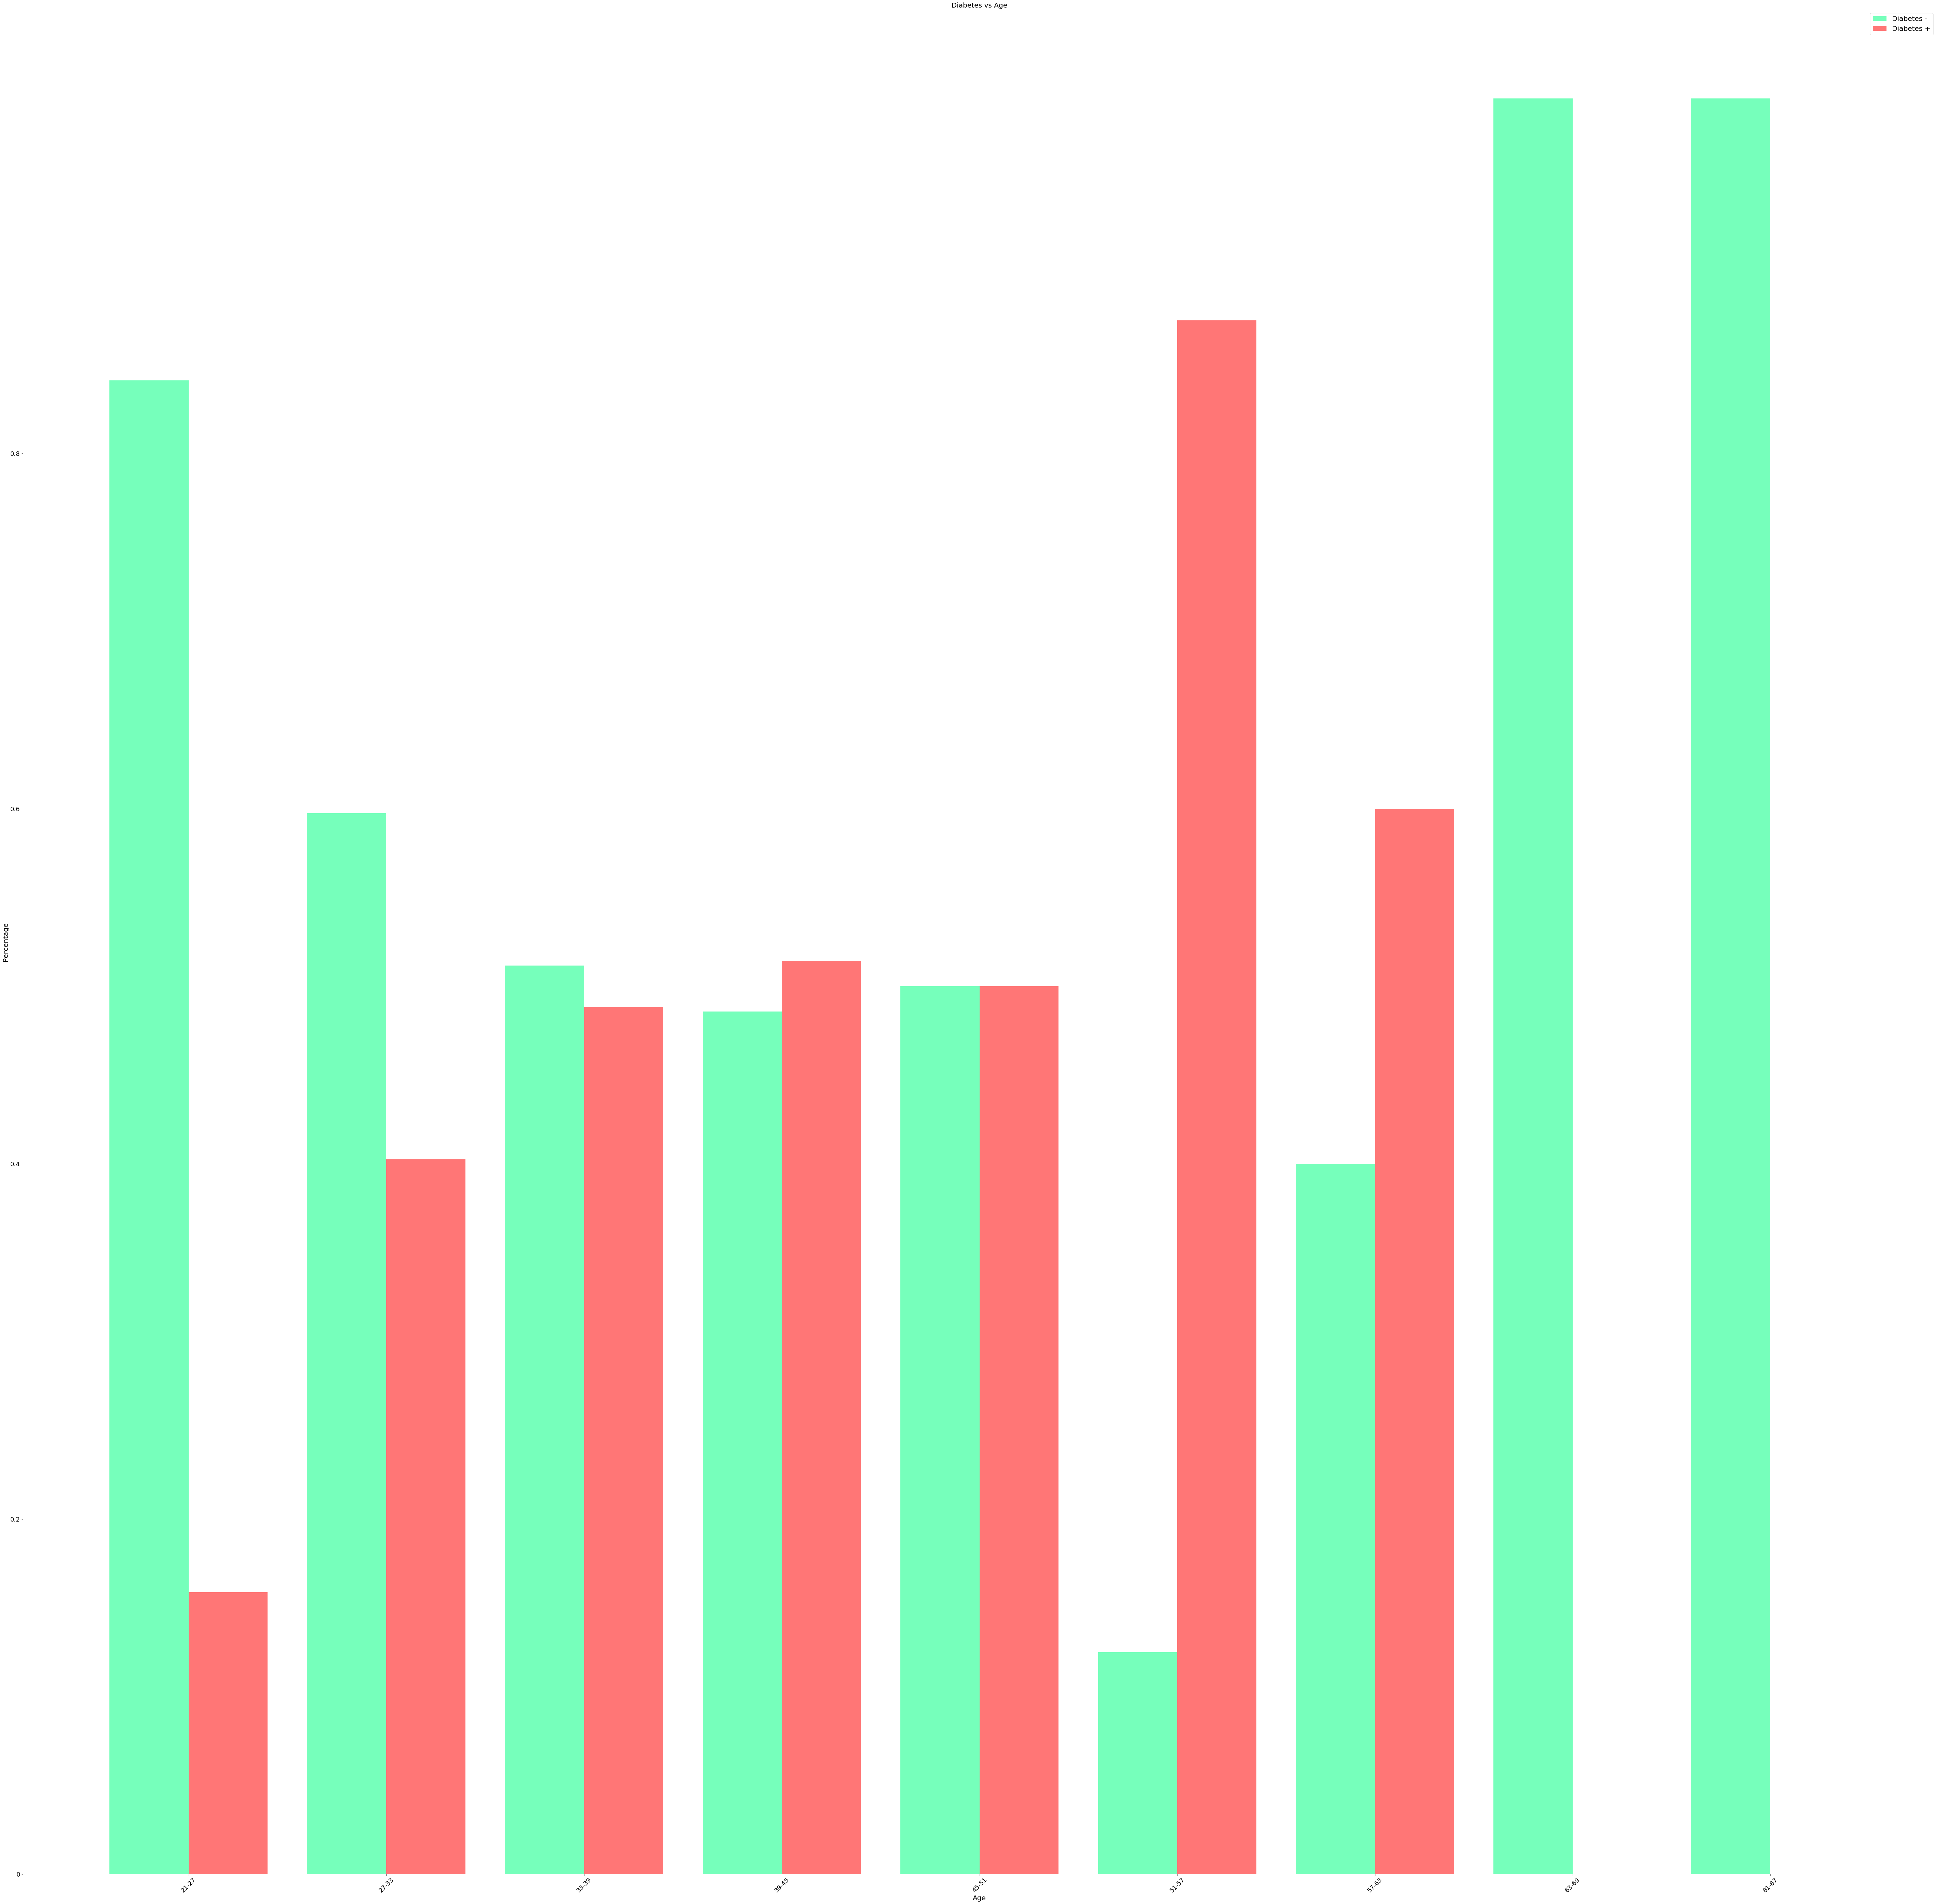

In [31]:

# Plot Pd
#you run each individuali to see the corresponding graph
plot_diab_bar(age_diab,title = 'Diabetes vs Age',object = 'Age')
#plot_diab_bar(pregnancies_diab,title = 'Diabetes vs Pregnancies',object = 'Pregnancies')
#plot_diab_bar(insulin_diab,title = 'Diabetes vs Insulin',object = 'Insulin')
#plot_diab_bar(glucose_diab ,title = 'Diabetes vs Glucose', object = 'Glucose')